In [1]:
# Import libs

# Libs for modeling
import numpy as np
import pandas as pd

# Libs for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Lib to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read data
data = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

data.shape

(1034, 9)

In [6]:
# Head

data.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [9]:
# Nulls

data.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

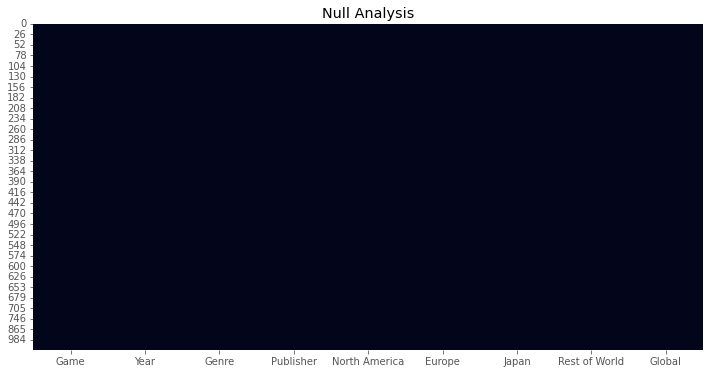

In [34]:
plt.figure( figsize=(12,6))
plt.title('Null Analysis')
sns.heatmap( data.isnull(), cbar=False );

In [14]:
data.dropna( inplace = True )

In [15]:
# Describre

data.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


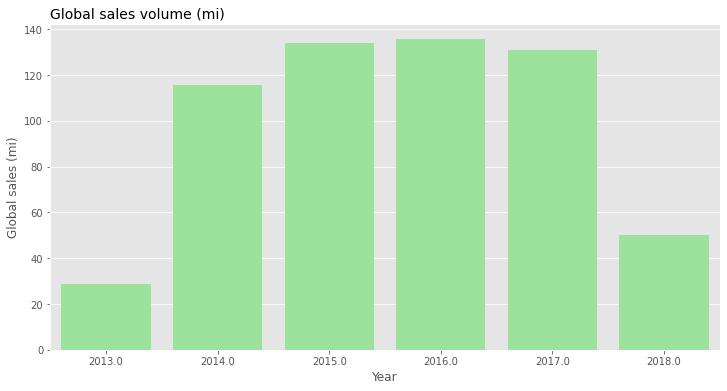

In [44]:
plt.figure( figsize=(12,6))

sns.barplot( data=data, x='Year', y='Global', ci=None, color='lightgreen',estimator=sum)

plt.title('Global sales volume (mi)', loc='left', fontsize=14)
plt.ylabel('Global sales (mi)');

In [25]:
data = data.loc[ (data['Year'] != 2019) & (data['Year'] != 2020)];

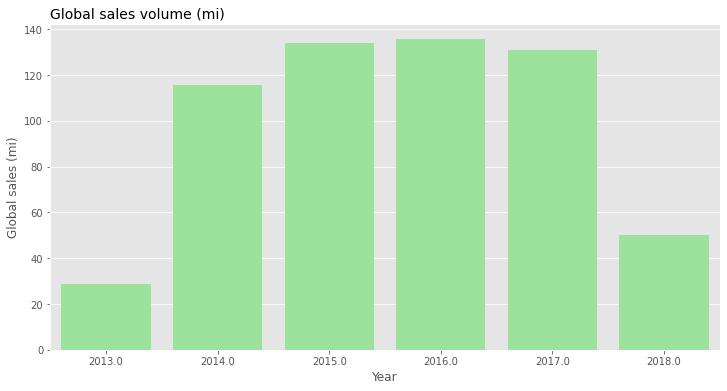

In [43]:
plt.figure( figsize=(12,6))

sns.barplot( data=data, x='Year', y='Global', ci=None, color='lightgreen',estimator=sum)

plt.title('Global sales volume (mi)', loc='left', fontsize=14)
plt.ylabel('Global sales (mi)');

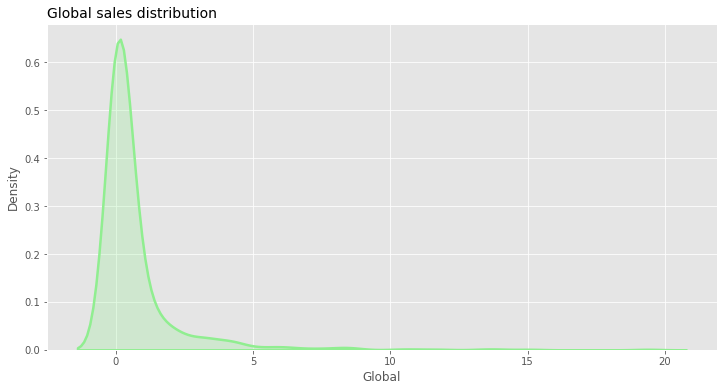

In [36]:
plt.figure( figsize=(12,6))

plt.style.use('ggplot')

plt.title('Global sales distribution', loc='left', fontsize=14)

sns.kdeplot( data=data['Global'], shade=True, color='lightgreen', linewidth=2.5);

In [37]:
data.groupby( by=['Year']).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


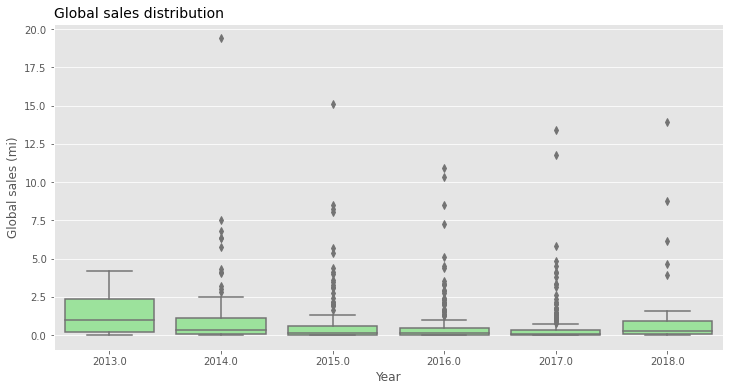

In [45]:
plt.figure( figsize=(12,6))

sns.boxplot( data=data, x='Year', y='Global', color='lightgreen')

plt.title('Global sales distribution', loc='left', fontsize=14)
plt.ylabel('Global sales (mi)');

In [46]:
data.loc[ data['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [55]:
Analise = data.groupby( by=['Year'] ).sum().reset_index()

America = [ America / Total * 100 for America, Total in zip( Analise['North America'], Analise['Global'] ) ]
Europa = [ Europa / Total * 100 for Europa, Total in zip( Analise['Europe'], Analise['Global'] ) ]
Japan = [ Japao / Total * 100 for Japao, Total in zip( Analise['Japan'], Analise['Global'] ) ]
World = [ Mundo / Total * 100 for Mundo, Total in zip( Analise['Rest of World'], Analise['Global'] ) ]

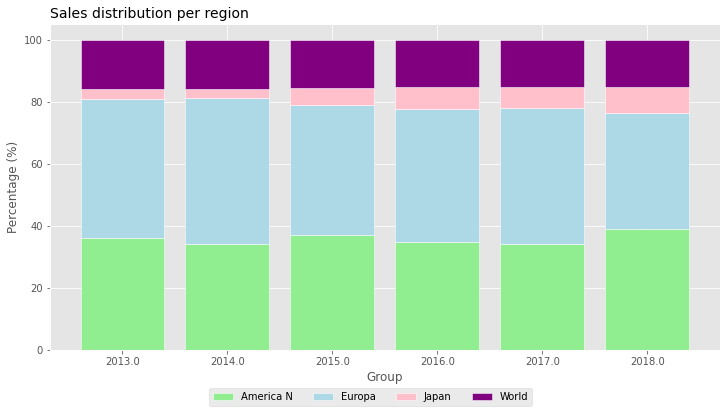

In [84]:
plt.figure( figsize=(12,6))

bar_length = 0.8
labels = Analise['Year']
groups = [0,1,2,3,4,5]

plt.bar(groups,America,width = bar_length, color='lightgreen', edgecolor='white')

plt.bar(groups,Europa, bottom=America, width = bar_length, color='lightblue', edgecolor='white')

plt.bar(groups,Japan, bottom=[ A + B for A,B in zip(America,Europa)], width = bar_length, color='pink', edgecolor='white')

plt.bar(groups,World, bottom=[ A + B +C for A,B,C in zip(America,Europa,Japan)], width = bar_length, color='purple', edgecolor='white')

plt.title('Sales distribution per region', loc='left', fontsize=14)
plt.ylabel('Percentage (%)')

plt.xticks( groups,labels)
plt.xlabel('Group');

plt.legend(['America N','Europa', 'Japan', 'World'], loc='upper left', bbox_to_anchor=(0.23,-0.1), ncol=4)